In [2]:
import scqubits as scq
import numpy as np

zp_yaml = """# zero-pi
branches:
- ["JJ", 1,2, EJ = 10, 20]
- ["JJ", 3,4, EJ, 20]
- ["L", 2,3, 0.008]
- ["L", 4,1, 0.008]
- ["C", 1,3, 0.02]
- ["C", 2,4, 0.02]
"""

zero_pi = scq.Circuit(zp_yaml, from_file=False)
system_hierarchy = [[1,3], [2]]

zero_pi.cutoff_n_1 = 15
zero_pi.cutoff_ext_2 = 50
zero_pi.cutoff_ext_3 = 100
zero_pi.configure(system_hierarchy=system_hierarchy, subsystem_trunc_dims=[150, 30])

## Visualization
### Simple parameter sweeps
Plotting the energy spectrum with varying one of the circuit parameters works just as for other qubit classes. For example:

Parallel computation of eigensystems [num_cpus=4]

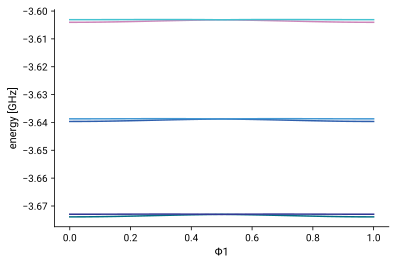

In [3]:
import numpy as np
zero_pi.plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21), num_cpus=4);


### Potential: symbolic expression and visualization
The expression of the potential is obtained from `potential_symbolic`:

In [4]:
zero_pi.potential_symbolic

0.008*θ3**2 + 0.032*θ2**2 - EJ*cos(1.0*θ1 - 1.0*θ3) - EJ*cos(-Φ1 + 1.0*θ1 + 1.0*θ3)

The potential can be visualized using `plot_potential`.

For the zero-pi example, there are three degrees of freedoms $(\theta_1, \theta_2, \theta_3)$. We can either fix all but two, or all but one variable. This produces either a contour plot of the potential within the selected 2d region, 

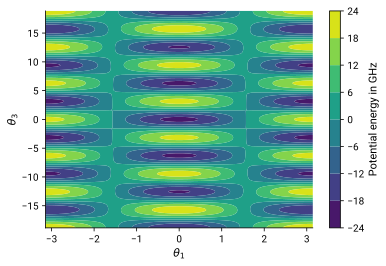

In [5]:
zero_pi.plot_potential(θ1=np.linspace(-np.pi, np.pi), 
                       θ3=np.linspace(-6*np.pi, 6*np.pi, 200), 
                       θ2 = 0.);

or a line plot when only one variable is specified with a range:

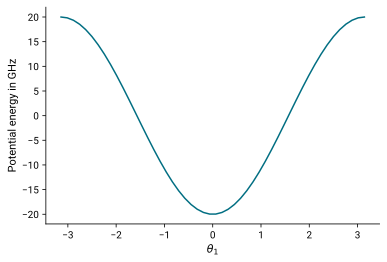

In [6]:
zero_pi.plot_potential(θ1=np.linspace(-np.pi, np.pi), θ3=0, θ2 = 0);

### Plotting the wavefunction
Plots for the probability density of the wavefunction are obtained with `plot_wavefunction`. This method takes two arguments: `which` specifies the energy eigenstate for which the wavefunction is plotted, `var_indices` specifies the variable axis along which the wavefunction is plotted. The probability density is summed over the non-specified variable indices.

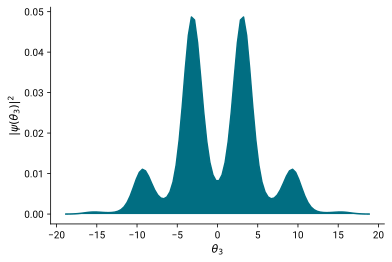

In [7]:
zero_pi.plot_wavefunction(which=0, var_indices=(3,));

A maximum of two variable indices can be specified for a plot:

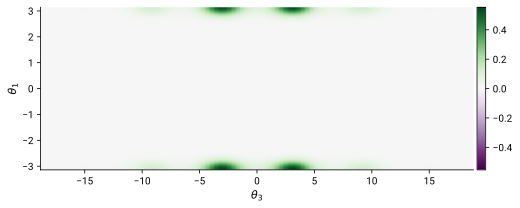

In [8]:
zero_pi.plot_wavefunction(which=0, var_indices=(1,3));

To avoid diagonalizing the system for every call of `plot_wavefunction`, we can
diagonalize the system once using eigensys and use it to plot the wavefunction repeatedly.     

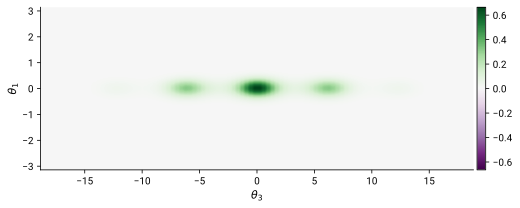

In [9]:
eigensys = zero_pi.eigensys()
zero_pi.plot_wavefunction(which=1, var_indices=(1,3), esys=eigensys);